# ZOMATO DATA ANALYSIS

### Import the Python libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Creating the data frame 

In [3]:
df = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


### Data Cleaning 

In [5]:
"""defining a user function which first takes the value from rate column and covert that into 
   string and split the string by "/" and return float of the first value"""


def handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### Finding missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Question 1 - What type of restaurant do the majority of customers order from?

In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

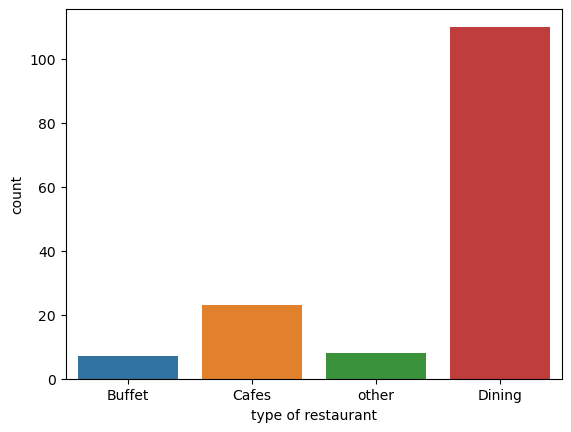

In [9]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("type of restaurant")

CONCLUSION - The type of restuarant from where majority of people order is from Dinning category

### Question 2 - How many votes has each type of restaurant received from customers? 

In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


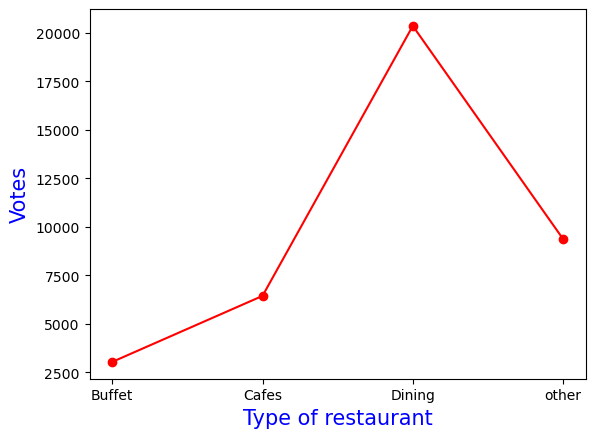

In [69]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
print(grouped_data)
results = pd.DataFrame({'votes':grouped_data})
plt.plot(results,c="red",marker="o")
plt.xlabel("Type of restaurant", c="blue" ,size=15 )
plt.ylabel("Votes", c="blue", size=15)

plt.show()


CONCLUSION - The dinning category restuarant has most rating that is 20363 and the buffet type restaurant has least rating that is 3028

### Question 3 - What are the ratings that the majority of restaurants have received?

In [70]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


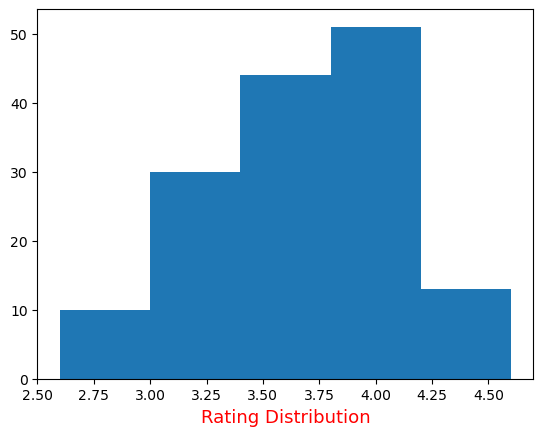

In [83]:
plt.hist(df['rate'], bins=5)
plt.xlabel("Rating Distribution", c="red", size=13)
plt.show()

CONCLUSION - The majority of the restaurants received ratings from 3.5 to 4 

### Question 4 - Zomato has observed that most couples order most of their food online. What is their average spending on each order? 

In [96]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


The average price the couple spend is: 418.2432432432432


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

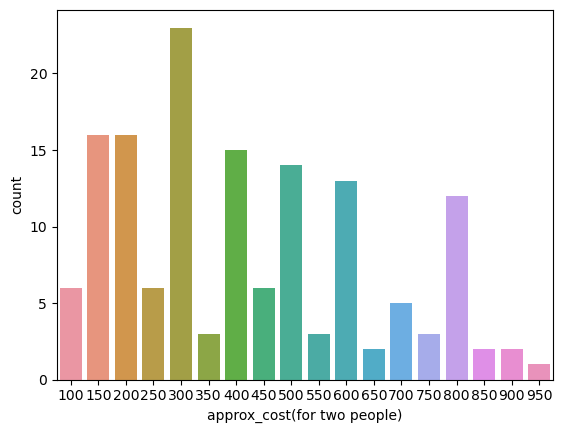

In [109]:
avg = df['approx_cost(for two people)'].mean()
print("The average price the couple spend is:",avg)
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)


CONCLUSION - The average price a couple spend on the online order is 418.24

### Question 5 - Which mode (online or offline) has received the maximum rating? 

In [110]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

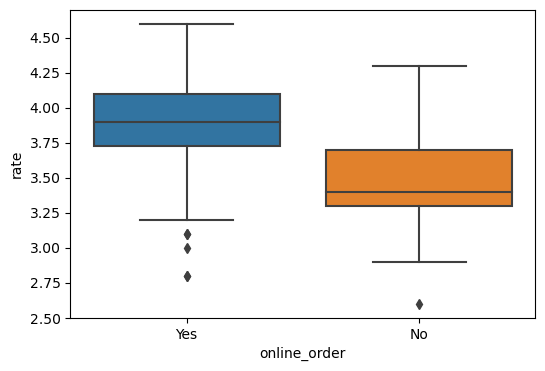

In [121]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'online_order',y = 'rate', data = df)

CONCLUSION - offline order recieves less ratings compared to online order

### Quetion 6 - Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers? 

In [122]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


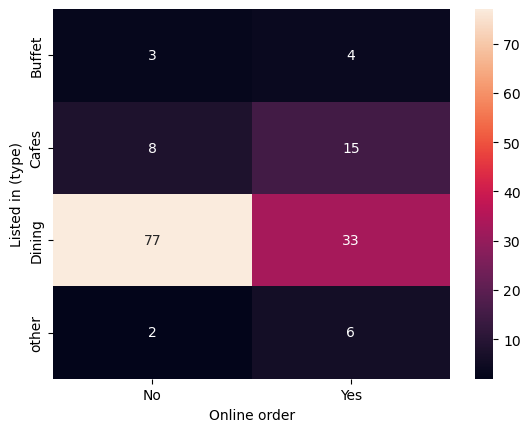

In [145]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order'
                            , aggfunc = 'size', fill_value = 0)
pivot_table

sns.heatmap(pivot_table,annot=True)
plt.xlabel("Online order")
plt.ylabel("Listed in (type)")
plt.show()

CONCLUSION - Dinning type of restaurant received most offline order so zomato can give offer to the customers who do dinning.